In [94]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [95]:
def linePZnaive(P1, P2, d, RGB):
    A = (P2[1]-P1[1])/(P2[0]-P1[0])
    B = -1
    C = P2[1] - A*P2[0]
        
    for x in range(min(P1[0], P2[0]), max(P1[0], P2[0])):
        for y in range(min(P1[1], P2[1]), max(P1[1], P2[1])):
            dl = abs(A*x + B*y + C)/math.sqrt(A*A + B*B)
            if abs(dl) < d:
                data[x,y] = 0.0
    
    return data

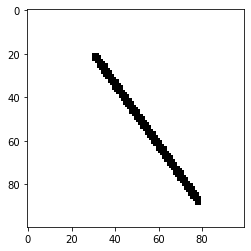

In [96]:
data=np.zeros((100,100,3), dtype=np.uint8)
data.fill(255)
RGB = linePZnaive((20, 30), (90, 80), 2, data)

plt.imshow(RGB, interpolation='none', aspect=1)
plt.show()

In [97]:
def linePZbre(P1, P2, d, RGB):
    if d < 1:
        raise ValueError('thickness must be bigger or equal to 1')
    x0, y0 = P1
    xk, yk = P2
    
    dx = xk-x0
    dy = yk-y0
    err = 0.0
    if (abs(dx) > abs(dy)):
        if(xk<x0):
            x0, xk = xk, x0
            y0, yk = yk, y0
            dx = xk-x0
            dy = yk-y0
        y=y0
        derr=abs(dy/dx)
        a= np.sign(dy)
        for x in range(x0, xk):
            RGB[y, x] = 0.0
            err += derr
            if (err > 0.5):
                y += a
                err += -1 
                
                for i in range(-d//2, d//2):
                    for j in range(-d//2, d//2):
                        RGB[y+j][x+i] = [0,0,0]
    else:
        if(yk<y0):
            y0, yk = yk, y0
            x0, xk = xk, x0
            dx = xk-x0
            dy = yk-y0
        x=x0
        derr=abs(dy/dx)
        a = np.sign(dx)
        for y in range(y0, yk):
            RGB[y, x] = 0.0
            err += derr
            if (err>0.5):
                x += a
                err += -1
                
                for i in range(-d//2, d//2):
                    for j in range(-d//2, d//2):
                        RGB[y+j][x+i] = [0,0,0]
    return RGB

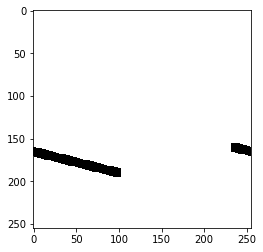

In [98]:
# tworzenie tablicy RGB o wymiarach 255x255
RGB = np.zeros((255, 255, 3), dtype=np.uint8)
RGB.fill(255)

# rysowanie odcinka o grubości d=10 pomiędzy punktami (-20, 160) i (100, 190)
RGB = linePZbre((-20, 160), (100, 190), 10, RGB)

# wyświetlenie tablicy RGB

plt.imshow(RGB, interpolation='none', aspect=1)
plt.show()


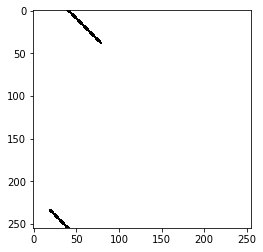

In [99]:
# tworzenie tablicy RGB o wymiarach 255x255
RGB = np.zeros((255, 255, 3), dtype=np.uint8)
RGB.fill(255)

# rysowanie odcinka o grubości d=3 pomiędzy punktami (40, 40) i (20, -20)
RGB = linePZbre((40, 40), (20, -20), 3, RGB)

# wyświetlenie tablicy RGB

plt.imshow(RGB, interpolation='none', aspect=1)
plt.show()
